# Outcome regression model for age

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('./stroke_data_dummies.csv')

In [3]:
df_r = df_raw[df_raw.Gender_Other == 0]

In [4]:
def age_check(x):
    if x >= 45:
        return 1
    else:
        return 0
    
df_r['old'] = df_r.age.apply(age_check)

In [5]:
df = df_r.drop(columns = ['Unnamed: 0','id','Obesity','Gender_Other','age'])

In [6]:
df.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban,old
0,0,1,228.69,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1
1,0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,171.23,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1
3,1,0,174.12,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,186.21,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1


In [7]:
X = df.drop(columns = ['stroke', 'old'])
X

,hypertension,heart_disease,avg_glucose_level,bmi,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,0,0,171.23,34.4,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,1,0,174.12,24.0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,0,0,186.21,29.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,0,0,103.08,18.6,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,0,0,125.20,40.0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,0,0,82.99,30.6,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4907,0,0,166.29,25.6,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [8]:
df_0 = df[df['old'] == 0]
df_0 = df_0.drop(columns = ['old'])
df_0

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
25,0,0,83.41,25.4,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
41,1,0,58.09,39.2,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0
64,0,0,143.43,45.9,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1
99,0,0,82.28,24.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
149,0,0,76.13,29.9,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,0,0,71.88,17.5,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1
4903,0,0,82.85,46.9,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4904,0,0,103.08,18.6,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4906,0,0,82.99,30.6,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0


In [9]:
df_1 = df[df['old'] == 1]
df_1 = df_1.drop(columns = ['old'])
df_1

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,0,1,228.69,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,0,0,171.23,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,1,0,174.12,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,0,0,186.21,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,1,0,71.97,28.3,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
4901,0,0,97.95,24.5,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1
4902,0,0,77.93,21.7,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
4905,0,0,125.20,40.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1


In [10]:
y_0 = df_0['stroke']
x_0 = df_0.drop(columns = ['stroke'])

In [11]:
y_1 = df_1['stroke']
x_1 = df_1.drop(columns = ['stroke'])

# Model for controlled group

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [13]:
rfc = RandomForestClassifier(random_state=60)
score_pre_0 = cross_val_score(rfc,x_0,y_0,cv=5).mean()
score_pre_0

0.9967537393426673

nan 1


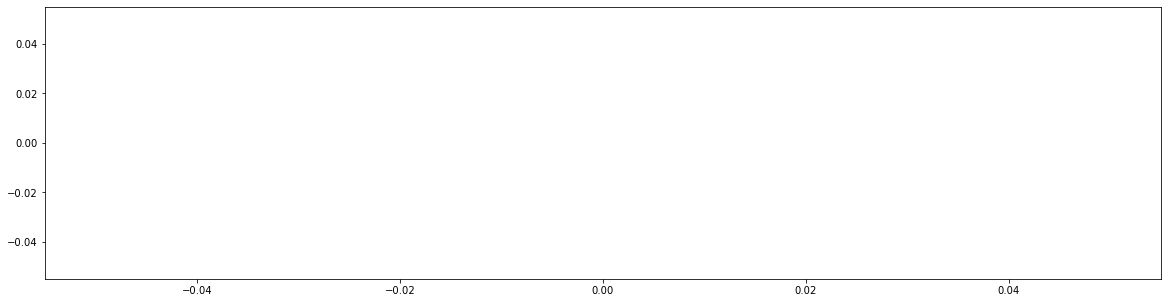

In [14]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

nan 1


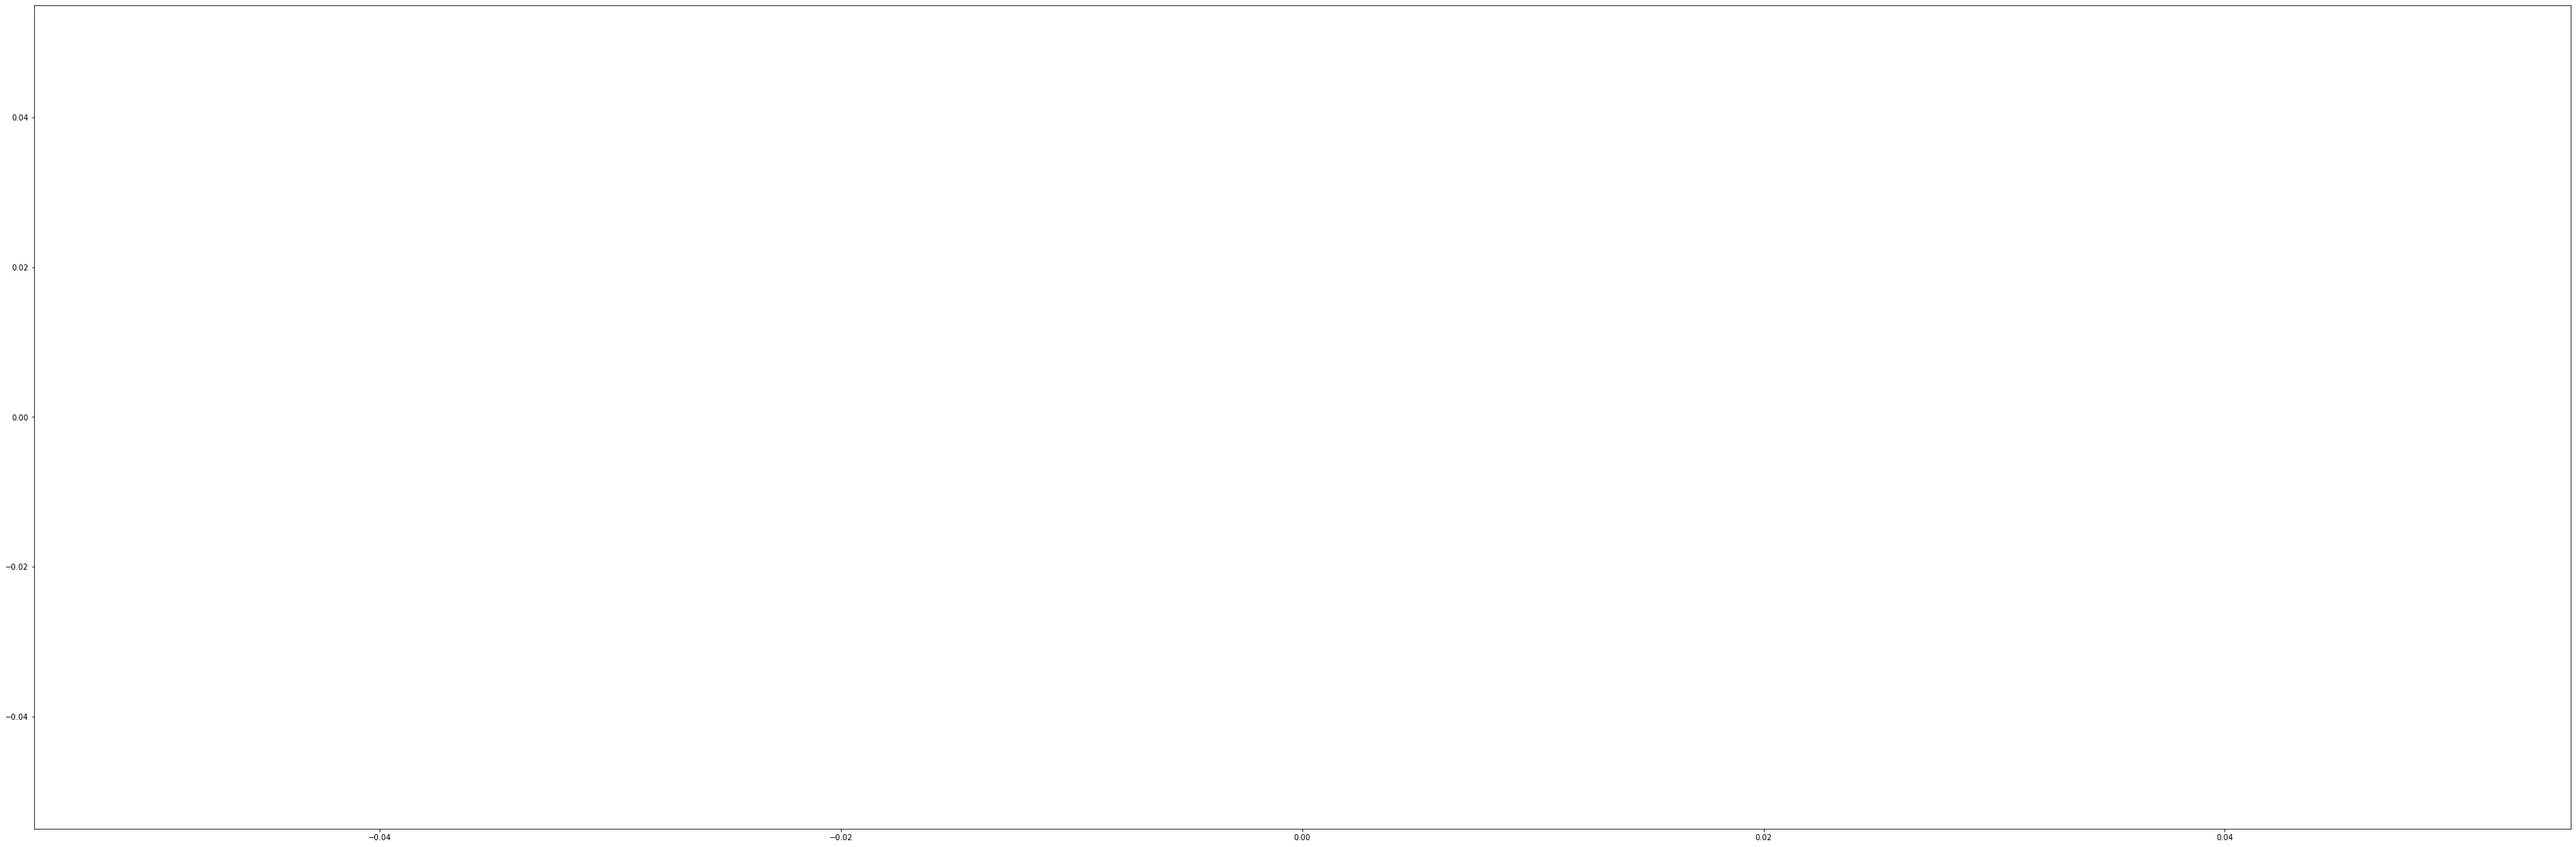

In [15]:
scorel = []
for i in range(1,51):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(1,51)][scorel.index(max(scorel))]))
plt.figure(figsize=[60,20])
plt.plot(range(1,51),scorel)
plt.show()

In [16]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=5
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=60),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
GS.best_params_

{'max_depth': 1}

In [18]:
GS.best_score_

0.9967537393426673

In [19]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=5
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=60),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [20]:
GS.best_params_

{'max_features': 1}

In [21]:
GS.best_score_

0.9967537393426673

In [22]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=5
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=60),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [23]:
GS.best_params_

{'min_samples_leaf': 2}

In [24]:
GS.best_score_

0.9967537393426673

In [25]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=5
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=60),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [26]:
GS.best_params_

{'min_samples_split': 3}

In [27]:
GS.best_score_

0.9967537393426673

In [28]:
rfc_0 = RandomForestClassifier(n_estimators=5,max_depth = 1,random_state=60)
score_0 = cross_val_score(rfc_0,x_0,y_0,cv=5).mean()
score_0

0.9967537393426673

In [29]:
score_0 - score_pre_0

0.0

# Model for treatment group

In [30]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre_1 = cross_val_score(rfc,x_1,y_1,cv=5).mean()
score_pre_1

0.9144825505380669

nan 1


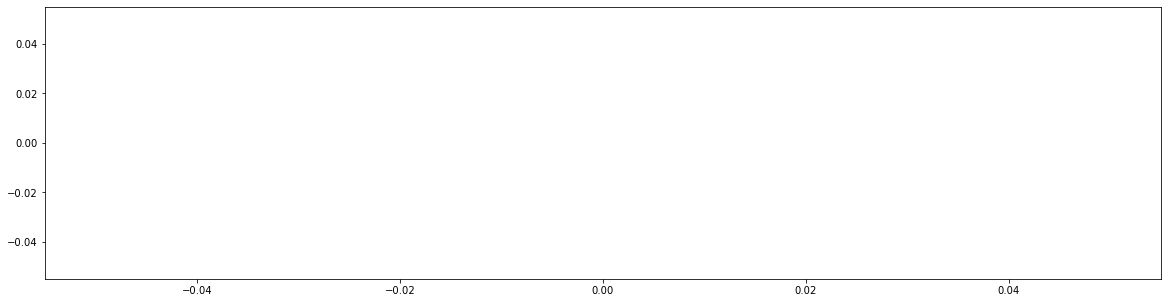

In [31]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

nan 21


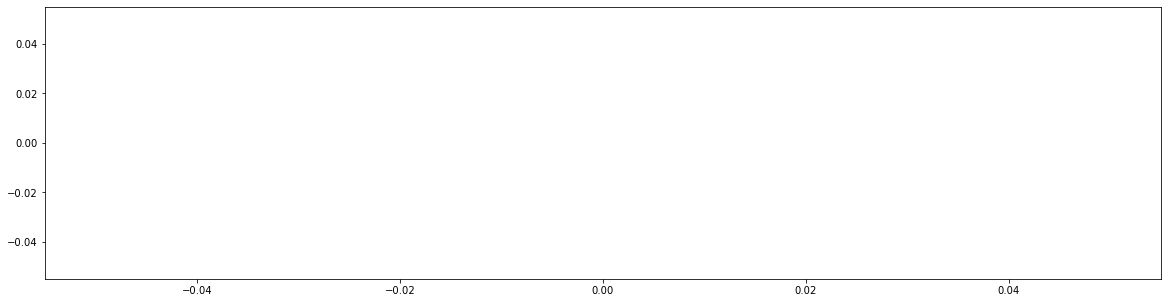

In [32]:
scorel = []
for i in range(21,81):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(21,81)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(21,81),scorel)
plt.show()

In [33]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=27
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=27, random_state=80),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [34]:
GS.best_params_

{'max_depth': 7}

In [35]:
GS.best_score_

0.9177587247309665

In [36]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=27
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=27, random_state=80),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [37]:
GS.best_params_

{'max_features': 8}

In [38]:
GS.best_score_

0.9136645546280466

In [39]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=27
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=27, random_state=80),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [40]:
GS.best_params_

{'min_samples_leaf': 3}

In [41]:
GS.best_score_

0.917757886620403

In [42]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=27
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=27, random_state=80),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [43]:
GS.best_params_

{'min_samples_split': 15}

In [44]:
GS.best_score_

0.917757886620403

In [45]:
rfc_1 = RandomForestClassifier(n_estimators=27,max_depth = 7,random_state=80)
score_1 = cross_val_score(rfc_1,x_1,y_1,cv=5).mean()
score_1

0.9177587247309665

In [46]:
score_1 - score_pre_1

0.0032761741928996058

# Outcome modeling

In [47]:
from scipy import stats
import scipy.stats

In [48]:
rfc0 = rfc_0.fit(x_0, y_0)

In [49]:
predict_0 = rfc0.predict(X)
mean_0 = predict_0.mean()
mean_0

0.0

In [50]:
rfc1 = rfc_1.fit(x_1, y_1)

In [51]:
predict_1 = rfc1.predict(X)
mean_1 = predict_1.mean()
mean_1

0.0014262428687856561

In [52]:
ATE_outcome = mean_1 - mean_0
ATE_outcome

0.0014262428687856561

In [53]:
t,pval = scipy.stats.ttest_ind(predict_0,predict_1,equal_var=False,alternative='less')
print(t,pval)

-2.6473703329260934 0.004068989309135414


# IPW for age

In [54]:
from sklearn.linear_model import LogisticRegression as lr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [55]:
# Enabled to remove warnings for demo purposes.
import warnings
warnings.filterwarnings('ignore')

In [56]:
import math
import numpy as np
import pandas as pd
# import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

from scipy import stats

In [57]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [58]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [59]:
# delete row with NA value
df_na = df.dropna()

In [60]:
df_na.reset_index(inplace=True)

In [61]:
pd.isnull(df_na).any()

index                False
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [62]:
df_na

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [63]:
df_na['ever_married'] = df_na.ever_married.map({'Yes':1, 'No':0})
# For gender, 1 means Male, 0 means Female
df_na['gender'] = df_na.gender.map({'Male':1, 'Female':0})
# For Residence_type, 1 means Urban, 0 means Rural
df_na['Residence_type'] = df_na.Residence_type.map({'Urban':1, 'Rural':0})

In [64]:
pd.isnull(df_na).any()

index                False
id                   False
gender                True
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [65]:
df_na = df_na.dropna()
df_na.reset_index(drop=True,inplace=True)
pd.isnull(df_na).any()

index                False
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [66]:
df_na

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1.0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,2,31112,1.0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,3,60182,0.0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,4,1665,0.0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,5,56669,1.0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,5104,14180,0.0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
4904,5106,44873,0.0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
4905,5107,19723,0.0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
4906,5108,37544,1.0,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [67]:
def AGE_check(x):
    if x >= 45:
        return 1
    else:
        return 0
    
df_na['treatment_age'] = df_na.age.apply(AGE_check)

In [68]:
df_data = df_na.drop(columns = ['index','id','age'])
df_data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,treatment_age
0,1.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1
1,1.0,0,1,1,Private,0,105.92,32.5,never smoked,1,1
2,0.0,0,0,1,Private,1,171.23,34.4,smokes,1,1
3,0.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,1
4,1.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,0,0,0,children,0,103.08,18.6,Unknown,0,0
4904,0.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0,1
4905,0.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0,0
4906,1.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0,1


In [69]:
df_encoded = pd.get_dummies(df_data, columns = ['work_type','smoking_status'], \
                           prefix = {'work_type':'work_type', 'smoking_status' : 'smoking_status'}, drop_first=False)
df_encoded

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,treatment_age,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0,0,1,0,0
1,1.0,0,1,1,0,105.92,32.5,1,1,0,0,1,0,0,0,0,1,0
2,0.0,0,0,1,1,171.23,34.4,1,1,0,0,1,0,0,0,0,0,1
3,0.0,1,0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0
4,1.0,0,0,1,1,186.21,29.0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,0,0,0,0,103.08,18.6,0,0,0,0,0,0,1,1,0,0,0
4904,0.0,0,0,1,1,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0
4905,0.0,0,0,1,0,82.99,30.6,0,0,0,0,0,1,0,0,0,1,0
4906,1.0,0,0,1,0,166.29,25.6,0,1,0,0,1,0,0,0,1,0,0


In [70]:
df_treatment = df_encoded[df_encoded['treatment_age']==1]
df_control = df_encoded[df_encoded['treatment_age']==0]

In [71]:
treat_mean = df_treatment.mean()
treat_std = df_treatment.std()
control_mean = df_control.mean()
control_std = df_control.std()

In [72]:
X_list = ['gender','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','work_type_Govt_job',
          'work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_Unknown',
          'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
X_descrip = ['0 to Female and 1 to Male','observation of hypertension','observation of heart_disease',
             'Marriage states','0 to Rural and 1 to Urban','average glucose level','bmi','Whether is government job',
             'Whether is never worked','Whether job is private','Whether job is self-employed','Whether job is children',
             'Whether smoking status is unknown','Whether is formerly smoked','Whether is never smoked','Whether is smokes']

In [73]:
summary_list = []

for i in range(0, len(X_list)):
    summary_list.append([X_list[i],X_descrip[i],control_mean[X_list[i]],control_std[X_list[i]],treat_mean[X_list[i]],treat_std[X_list[i]],
                    stats.ttest_ind(df_control[X_list[i]], df_treatment[X_list[i]], equal_var=False)[0]])

summary_df = pd.DataFrame(summary_list,columns=
                          ['Label', 'Variable Description','Controls Mean','Controls STD','Treated Mean','Treated STD','t-Statistics'])
summary_df

,Label,Variable Description,Controls Mean,Controls STD,Treated Mean,Treated STD,t-Statistics
0,gender,0 to Female and 1 to Male,0.403815,0.490761,0.415712,0.492945,-0.847259
1,hypertension,observation of hypertension,0.019886,0.139638,0.164484,0.370790,-18.051112
2,heart_disease,observation of heart_disease,0.002435,0.049296,0.096972,0.295980,-15.577435
3,ever_married,Marriage states,0.385552,0.486824,0.922259,0.267819,-47.902598
4,Residence_type,0 to Rural and 1 to Urban,0.497565,0.500096,0.517185,0.499807,-1.374646
5,avg_glucose_level,average glucose level,95.613389,30.794491,115.060663,53.086851,-15.681360
6,bmi,bmi,27.026177,8.367229,30.778232,6.801232,-17.244675
7,work_type_Govt_job,Whether is government job,0.090503,0.286960,0.166530,0.372632,-8.003549
8,work_type_Never_worked,Whether is never worked,0.008929,0.094087,0.000000,0.000000,4.710540
9,work_type_Private,Whether job is private,0.566558,0.495651,0.578560,0.493891,-0.849660


In [74]:
df = df_encoded
df

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,treatment_age,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0,0,1,0,0
1,1.0,0,1,1,0,105.92,32.5,1,1,0,0,1,0,0,0,0,1,0
2,0.0,0,0,1,1,171.23,34.4,1,1,0,0,1,0,0,0,0,0,1
3,0.0,1,0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0
4,1.0,0,0,1,1,186.21,29.0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,0,0,0,0,103.08,18.6,0,0,0,0,0,0,1,1,0,0,0
4904,0.0,0,0,1,1,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0
4905,0.0,0,0,1,0,82.99,30.6,0,0,0,0,0,1,0,0,0,1,0
4906,1.0,0,0,1,0,166.29,25.6,0,1,0,0,1,0,0,0,1,0,0


In [75]:
Y = df.stroke

df_data = df.loc[:,df.columns !='stroke']
T = df_data.treatment_age
X = df_data.loc[:,df_data.columns !='treatment_age']

In [76]:
X_a = ['hypertension','heart_disease','avg_glucose_level','bmi']

In [77]:
T.mean()

0.4979625101874491

In [78]:
# weighted based on size ratio of treatment group and control group
model_initial = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.8}))])
model_initial.fit(X.loc[:,X_a], T)

predictions_binary = model_initial.predict(X.loc[:,X_a])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.6483

Confusion matrix:
[[1053 1411]
 [ 315 2129]]

F1 score is: 0.7116


In [79]:
likelihood_ratio_table = []
X_l = X_a.copy()

while not likelihood_ratio_table or max([x for x in likelihood_ratio_table[-1].values() if x != '-']) >= 1:
    if likelihood_ratio_table:
        max_likelihood_ratio = max([x for x in likelihood_ratio_table[-1].values() if x != '-'])
        next_label = [key for key in likelihood_ratio_table[-1] if likelihood_ratio_table[-1][key] == max_likelihood_ratio][0]
        X_l.append(next_label)
    model = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.8}))])
    model.fit(X.loc[:,X_l], T)
    step = {}
    for x in X.columns:
        if x in X_l:
            step[x] = '-'
        else:
            X_new = X_l.copy()
            X_new.append(x)
            model_new = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.8}))])
            model_new.fit(X.loc[:,X_new], T)
            
            step[x] = -2*((-metrics.log_loss(T, model.predict_proba(X.loc[:,X_l]))*len(T))
                      -(-metrics.log_loss(T, model_new.predict_proba(X.loc[:,X_new]))*len(T)))
    likelihood_ratio_table.append(step)

In [80]:
linear_terms_list = []
for x in X.columns:
    row = [step[x] for step in likelihood_ratio_table]
    row.insert(0, x)
    linear_terms_list.append(row)
    
columns = ['Label']
for i in range(0,len(likelihood_ratio_table)):
    step = 'Step ' + str(i+1)
    columns.append(step)
    
linear_terms_df = pd.DataFrame(linear_terms_list,columns = columns)
linear_terms_df

,Label,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,Step 10
0,gender,0.426998,1.399362,3.895933,5.558384,4.212808,4.370331,4.516161,-,-,-
1,hypertension,-,-,-,-,-,-,-,-,-,-
2,heart_disease,-,-,-,-,-,-,-,-,-,-
3,ever_married,1371.404411,-,-,-,-,-,-,-,-,-
4,Residence_type,2.87283,2.67131,2.708461,2.15928,2.471772,2.229507,2.337096,2.382211,-,-
5,avg_glucose_level,-,-,-,-,-,-,-,-,-,-
6,bmi,-,-,-,-,-,-,-,-,-,-
7,work_type_Govt_job,52.248799,8.963068,5.294081,20.801019,20.456227,-,-,-,-,-
8,work_type_Never_worked,24.194315,4.398252,7.760698,6.658812,6.094552,5.719204,-,-,-,-
9,work_type_Private,4.211225,43.742427,110.161818,17.689519,17.578046,5.133531,0.107287,0.122075,0.13468,0.166491


In [81]:
X_l

['hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'ever_married',
 'work_type_children',
 'work_type_Self-employed',
 'smoking_status_formerly smoked',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'gender',
 'Residence_type',
 'smoking_status_Unknown']

In [82]:
model_linear = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.8}))])
model_linear.fit(X.loc[:,X_l], T)

predictions_binary = model_linear.predict(X.loc[:,X_l])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.7765

Confusion matrix:
[[1490  974]
 [ 123 2321]]

F1 score is: 0.8089


In [83]:
X_copy = X.loc[:,X_l]

for i in range(0, len(X_l)):
    j = i
    while j < len(X_l):
        X_copy[X_l[i]+'*'+X_l[j]] = X_copy[X_l[i]] * X_copy[X_l[j]]
        j += 1

X_copy

,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,work_type_children,work_type_Self-employed,smoking_status_formerly smoked,work_type_Govt_job,work_type_Never_worked,...,work_type_Never_worked*work_type_Never_worked,work_type_Never_worked*gender,work_type_Never_worked*Residence_type,work_type_Never_worked*smoking_status_Unknown,gender*gender,gender*Residence_type,gender*smoking_status_Unknown,Residence_type*Residence_type,Residence_type*smoking_status_Unknown,smoking_status_Unknown*smoking_status_Unknown
0,0,1,228.69,36.6,1,0,0,1,0,0,...,0,0.0,0,0,1.0,1.0,0.0,1,0,0
1,0,1,105.92,32.5,1,0,0,0,0,0,...,0,0.0,0,0,1.0,0.0,0.0,0,0,0
2,0,0,171.23,34.4,1,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,1,0,0
3,1,0,174.12,24.0,1,0,1,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,0
4,0,0,186.21,29.0,1,0,0,1,0,0,...,0,0.0,0,0,1.0,1.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0,0,103.08,18.6,0,1,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,1
4904,0,0,125.20,40.0,1,0,1,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,1,0,0
4905,0,0,82.99,30.6,1,0,1,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,0
4906,0,0,166.29,25.6,1,0,0,1,0,0,...,0,0.0,0,0,1.0,0.0,0.0,0,0,0


In [84]:
likelihood_ratio_table = []
X_2 = X_l.copy()

while not likelihood_ratio_table or max([x for x in likelihood_ratio_table[-1].values() if x != '-']) >= 2.71:
    if likelihood_ratio_table:
        max_likelihood_ratio = max([x for x in likelihood_ratio_table[-1].values() if x != '-'])
        next_label = [key for key in likelihood_ratio_table[-1] if likelihood_ratio_table[-1][key] == max_likelihood_ratio][0]
        X_2.append(next_label)
    model = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.8}))])
    model.fit(X_copy.loc[:,X_2], T)
    step = {}
    for x in X_copy.columns:
        if x in X_2:
            step[x] = '-'
        else:
            X_new = X_2.copy()
            X_new.append(x)
            model_new = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.8}))])
            model_new.fit(X_copy.loc[:,X_new], T)
            
            step[x] = -2*((-metrics.log_loss(T, model.predict_proba(X_copy.loc[:,X_2]))*len(T))
                      -(-metrics.log_loss(T, model_new.predict_proba(X_copy.loc[:,X_new]))*len(T)))
    likelihood_ratio_table.append(step)

In [85]:
final_terms_list = []
for x in X_copy.columns:
    row = [step[x] for step in likelihood_ratio_table]
    row.insert(0, x)
    final_terms_list.append(row)
    
final_columns = ['Label']
for i in range(0,len(likelihood_ratio_table)):
    step = 'Step ' + str(i+1)
    final_columns.append(step)
    
final_terms_df = pd.DataFrame(final_terms_list,columns = final_columns)
final_terms_df

,Label,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,Step 10,Step 11,Step 12,Step 13
0,hypertension,-,-,-,-,-,-,-,-,-,-,-,-,-
1,heart_disease,-,-,-,-,-,-,-,-,-,-,-,-,-
2,avg_glucose_level,-,-,-,-,-,-,-,-,-,-,-,-,-
3,bmi,-,-,-,-,-,-,-,-,-,-,-,-,-
4,ever_married,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,gender*Residence_type,0.429994,0.403544,0.558156,0.683972,0.720772,0.76443,0.718604,0.538403,0.493732,0.495043,0.439343,0.43719,0.429173
100,gender*smoking_status_Unknown,1.820233,1.945364,1.914713,1.94973,2.135697,2.224161,2.244701,2.374423,2.25699,2.237716,2.245748,2.249313,2.589337
101,Residence_type*Residence_type,-0.008313,0.029036,-0.002622,-0.004469,-0.010611,0.0068,-0.023514,-0.006852,0.028871,0.036367,-0.016753,-0.004798,0.016673
102,Residence_type*smoking_status_Unknown,1.050397,0.907173,0.996454,0.948782,1.020441,0.964801,1.02766,1.092424,1.196983,1.245719,1.460514,1.446446,1.440634


In [86]:
X_2

['hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'ever_married',
 'work_type_children',
 'work_type_Self-employed',
 'smoking_status_formerly smoked',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'gender',
 'Residence_type',
 'smoking_status_Unknown',
 'avg_glucose_level*avg_glucose_level',
 'hypertension*bmi',
 'hypertension*ever_married',
 'bmi*bmi',
 'hypertension*smoking_status_formerly smoked',
 'ever_married*work_type_Govt_job',
 'ever_married*work_type_Self-employed',
 'bmi*ever_married',
 'work_type_Self-employed*smoking_status_formerly smoked',
 'avg_glucose_level*bmi',
 'heart_disease*work_type_Govt_job',
 'hypertension*gender']

In [87]:
model_final = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.8}))])
model_final.fit(X_copy.loc[:,X_2], T)

predictions_binary = model_final.predict(X_copy.loc[:,X_2])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.7765

Confusion matrix:
[[1466  998]
 [  99 2345]]

F1 score is: 0.8104


In [88]:
treat_index = []
control_index = []
for i in range(0,len(T)):
    if T[i] == 1:
        treat_index.append(i)
    elif T[i] == 0:
        control_index.append(i)

In [89]:
predictions = model_final.predict_proba(X_copy.loc[:,X_2])

ate_ipw = sum([T[i]*Y[i]/predictions[i][1] for i in treat_index]) / sum([T[i]/predictions[i][1] for i in treat_index]) 
- sum([(1-T[i])*Y[i]/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index])

-0.005539070631606655

In [92]:
A = sum([T[i]*Y[i]/predictions[i][1] for i in treat_index]) / sum([T[i]/predictions[i][1] for i in treat_index])
A

0.079079664663252

In [93]:
B = sum([(1-T[i])*Y[i]/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index])
B

0.005539070631606655

In [95]:
ate_ipw = A - B
ate_ipw

0.07354059403164535

# Doubly-robust estimator

In [96]:
ate_dr = ATE_outcome + ate_ipw - sum([T[i]*mean_1/predictions[i][1] for i in treat_index])/ sum([T[i]/predictions[i][1] for i in treat_index]) + sum([(1-T[i])*mean_0/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index]) 

In [97]:
ate_dr

0.07354059403164537